In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [227]:
data= pd.read_excel("ENB2012_data.xlsx") # load data
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [228]:
data=data.drop(columns =['Unnamed: 10','Unnamed: 11']) #drop the unwanted coloumns
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [229]:
data.isnull().sum()   #checking for any null values.

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Plot to see if any outliers are present!

Text(0.5, 1.0, 'Glazing Area Distribution')

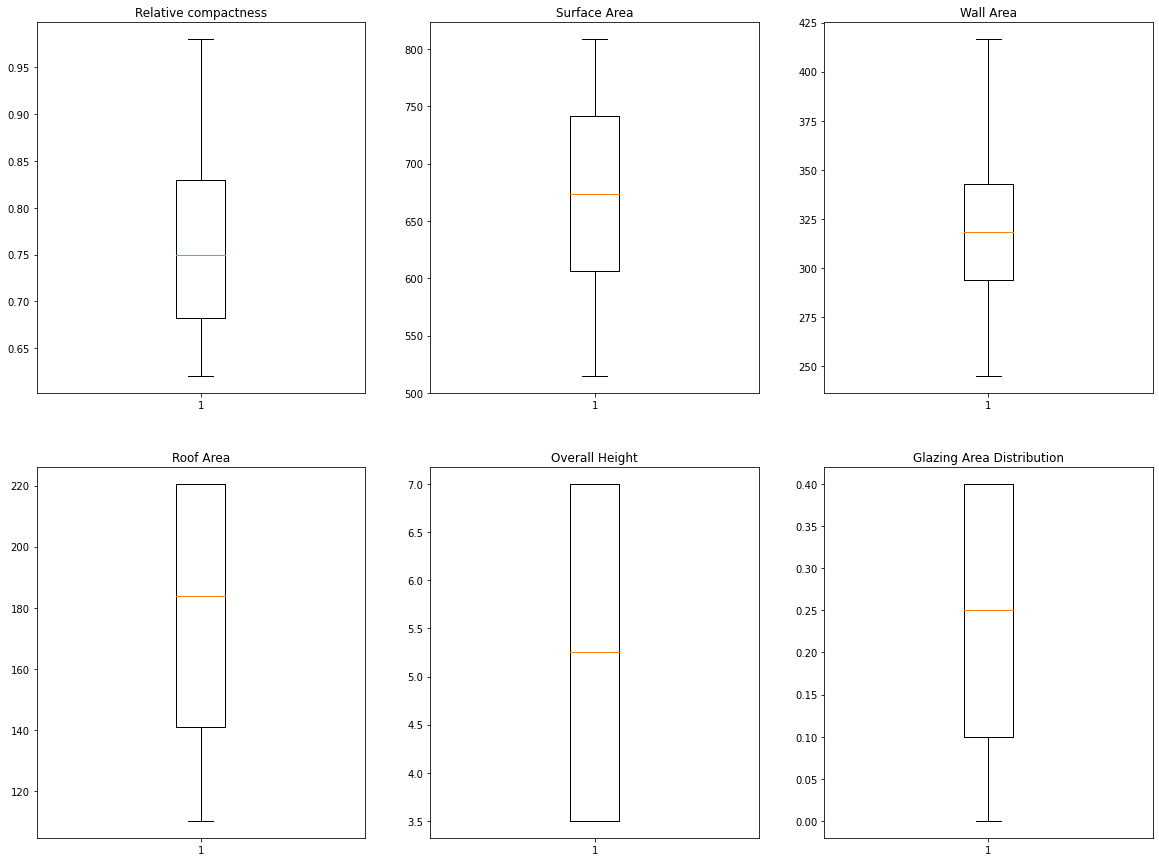

In [231]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(231)
plt.boxplot(data.X1)
ax.set_title('Relative compactness')

ax = plt.subplot(232)
plt.boxplot(data.X2)
ax.set_title('Surface Area')

ax = plt.subplot(233)
plt.boxplot(data.X3)
ax.set_title('Wall Area')

ax = plt.subplot(234)
plt.boxplot(data.X4)
ax.set_title('Roof Area')

ax = plt.subplot(235)
plt.boxplot(data.X5)
ax.set_title('Overall Height')

ax = plt.subplot(236)
plt.boxplot(data.X7)
ax.set_title('Glazing Area Distribution')

In [232]:
#data.drop("Y1",axis=1,inplace=True)   # We have to calculate for cooling Load, so we drop column for heating Load.
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [233]:
data.corr()  # corelation between each attributes

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [234]:
X=data[data.columns[:8]] 
Y=data[data.columns[8:]]  # Here we placed two attributes
X.shape," ",Y.shape

((768, 8), ' ', (768, 2))

Split data into training and testing set using train_test_split from sklearn

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

print(X_train.shape,"  ",X_test.shape)
print(Y_train.shape,"  ",Y_test.shape)

(537, 8)    (231, 8)
(537, 2)    (231, 2)


Checking for the correlation between the dependent variables and choosing the good predcitors

<AxesSubplot:>

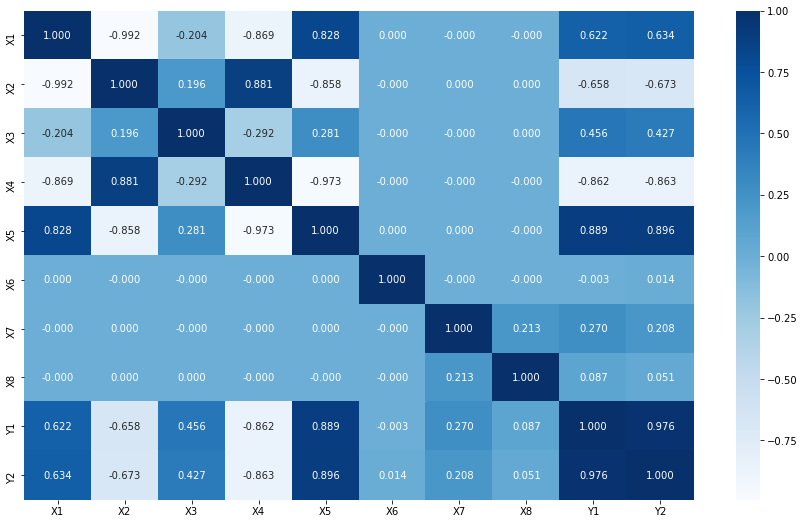

In [236]:
plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(),annot=True, cmap="Blues",fmt='0.3f')  # Plotting heatmap of correlation

from the above heat map we get a high corelation between X2-X4 =0.881, X5-X1=0.828,and X5-Y2=0.896

# Performing linear regression using classical approch from statsmodel. 

# Here our dependent attribute is Y2(Cooling Load). 

In [237]:
import statsmodels.formula.api as smf # fitting the model

model02 = smf.ols('Y2~X1+X2+X3+X4+X5+X6+X7+X8', data = data).fit()

In [238]:
model02.params

Intercept    97.245749
X1          -70.787707
X2           -0.066090
X3            0.022528
X4           -0.044309
X5            4.283843
X6            0.121510
X7           14.717068
X8            0.040697
dtype: float64

In [239]:
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:58:28   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.2457     20.765      4.683      0.000      56.483     138.009
X1           -70.7877     11.225     -6.306      0.000     -92.824     -48.751
X2            -0.0661      0.015     -4.519      0.000      -0.095      -0.037
X3             0.0225      0.004      5.365      0.000       0.014       0.031
X4            -0.0443      0.008     -5.404      0.000      -0.060      -0.028
X5             4.2838      0.369     11.618      0.000       3.560       5.008
X6             0.1215      0.103      1.176      0.240      -0.081       0.324
X7            14.7171      0.888     16.573      0.000      12.974      16.460
X8             0.0407      0.076      0.534      0.594      -0.109       0.190
==============================================================================
Omnibus:                      104.668   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.547
Skew:                           0.767   Prob(JB):                     8.65e-51
Kurtosis:                       5.203   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This model has a R-squared value of 0.888. However, "p value" of Orientation and Glazing Area Distribution greater than 0.05. So we try to build a better model.

In [240]:
#prepare a model based on Orientation
model_O=smf.ols('Y2~X6',data=data).fit()

In [241]:
model_O.params

Intercept    24.162474
X6            0.121510
dtype: float64

In [242]:
model_O.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1564
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.693
Time:                        21:58:30   Log-Likelihood:                -2819.2
No. Observations:                 768   AIC:                             5642.
Df Residuals:                     766   BIC:                             5652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.1625      1.129     21.406      0.000      21.947      26.378
X6             0.1215      0.307      0.396      0.693      -0.482       0.725
==============================================================================
Omnibus:                      392.702   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.149
Skew:                           0.395   Prob(JB):                     3.20e-14
Kurtosis:                       1.851   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of X6 (Orientation) is greater than 0.05 and less correlation so we neglect the variable Orientation(X6) in model.

In [243]:
#prepare a model based on Glazing Area Distribution
model_GD=smf.ols('Y2~X8', data=data).fit()
model_GD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.960
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.162
Time:                        21:58:31   Log-Likelihood:                -2818.3
No. Observations:                 768   AIC:                             5641.
Df Residuals:                     766   BIC:                             5650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.7161      0.711     33.366      0.000      22.321      25.111
X8             0.3099      0.221      1.400      0.162      -0.125       0.744
==============================================================================
Omnibus:                      391.345   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.251
Skew:                           0.396   Prob(JB):                     3.04e-14
Kurtosis:                       1.852   Cond. No.                         7.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again due to less colinearity and high p-value, X8 (Glazing Area Distribution) is not used in model.

In [244]:
# Finally prepare a model based on Glazing Area Distribution and Orientation
model_OG=smf.ols('Y2~X6+X8', data=data).fit()
model_OG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.057
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.348
Time:                        21:58:33   Log-Likelihood:                -2818.3
No. Observations:                 768   AIC:                             5643.
Df Residuals:                     765   BIC:                             5656.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2908      1.289     18.075      0.000      20.761      25.820
X6             0.1215      0.307      0.396      0.692      -0.481       0.724
X8             0.3099      0.221      1.399      0.162      -0.125       0.745
==============================================================================
Omnibus:                      393.370   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.260
Skew:                           0.396   Prob(JB):                     3.02e-14
Kurtosis:                       1.851   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Still there is no correlationa with high p-value

In [245]:
# Confidence interval
print(model02.conf_int(0.05)) # 95% confidnece level

                   0           1
Intercept  56.482747  138.008752
X1        -92.823923  -48.751491
X2         -0.094802   -0.037379
X3          0.014284    0.030771
X4         -0.060405   -0.028213
X5          3.559993    5.007694
X6         -0.081312    0.324333
X7         12.973809   16.460328
X8         -0.109041    0.190436


In [246]:
pred02=model02.predict(data)  # predicting data
pred02

0      25.838230
1      25.959741
2      26.081251
3      26.202762
4      28.271956
         ...    
763    19.774852
764    19.758785
765    19.880296
766    20.001806
767    20.123316
Length: 768, dtype: float64

 Calculating VIF's values of independent variables

In [247]:
rsq_X1 = smf.ols('X1~X2+X3+X4+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X1 = 1/(1-rsq_X1)
rsq_X2 = smf.ols('X2~X1+X3+X4+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X2 = 1/(1-rsq_X2)
rsq_X3 = smf.ols('X3~X2+X1+X4+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X3 = 1/(1-rsq_X3)
rsq_X4 = smf.ols('X4~X2+X3+X1+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X4 = 1/(1-rsq_X4)
rsq_X5 = smf.ols('X5~X2+X3+X4+X1+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X5 = 1/(1-rsq_X5)
rsq_X6 = smf.ols('X6~X2+X3+X4+X5+X1+X7+X8',data=data).fit().rsquared  # residual square 
vif_X6 = 1/(1-rsq_X6)
rsq_X7 = smf.ols('X7~X2+X3+X4+X5+X6+X1+X8',data=data).fit().rsquared  # residual square 
vif_X7 = 1/(1-rsq_X7)
rsq_X8 = smf.ols('X8~X2+X3+X4+X5+X6+X7+X1',data=data).fit().rsquared  # residual square 
vif_X8 = 1/(1-rsq_X8)

In [248]:
# Storing vif values in a data frame
d1 = {'Variables':['X1','X2','X3','X4','X5','X6','X7','X8'],'VIF':[vif_X1,vif_X2,vif_X3,vif_X4,vif_X5,vif_X6,vif_X7,vif_X8], 'RSQ':[rsq_X1,rsq_X2,rsq_X3,rsq_X4,rsq_X5,rsq_X6,rsq_X7,rsq_X8]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF,RSQ
0,X1,105.524054,0.990523
1,X2,inf,1.000000
2,X3,inf,1.000000
3,X4,inf,1.000000
4,X5,31.205474,0.967954
5,X6,1.000000,0.000000
6,X7,1.047508,0.045354
7,X8,1.047508,0.045354


Here we get infinite VIF values so it shows that X2,X3,X4 has high corelation. Also, X1, X5 and X7 has some corelation .

Finally we can drop the X6 and X8 cloumns and fit the model for regression.

In [249]:
#WE drop the X6 and X8 column as it's p value exceds
model03=smf.ols('Y2~X1+X2+X3+X4+X5+X7',data=data).fit()
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1203.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:58:42   Log-Likelihood:                -1980.2
No. Observations:                 768   AIC:                             3972.
Df Residuals:                     762   BIC:                             4000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.7618     20.756      4.710      0.000      57.015     138.508
X1           -70.7877     11.223     -6.307      0.000     -92.819     -48.756
X2            -0.0661      0.015     -4.520      0.000      -0.095      -0.037
X3             0.0225      0.004      5.366      0.000       0.014       0.031
X4            -0.0443      0.008     -5.405      0.000      -0.060      -0.028
X5             4.2838      0.369     11.620      0.000       3.560       5.008
X7            14.8180      0.867     17.082      0.000      13.115      16.521
==============================================================================
Omnibus:                      104.896   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.225
Skew:                           0.766   Prob(JB):                     3.74e-51
Kurtosis:                       5.215   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R-squared value is 0.888. Which is similar to previous model , as the Glazing area distribution and the Orientation has no influence on the depndent variable.

In [250]:
pred03=model03.predict(data) # predicting the model to check model strength
pred03

0      26.111308
1      26.111308
2      26.111308
3      26.111308
4      28.545034
         ...    
763    19.520273
764    19.868738
765    19.868738
766    19.868738
767    19.868738
Length: 768, dtype: float64

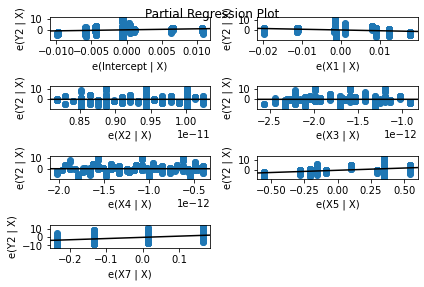

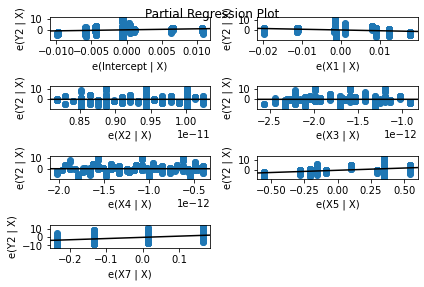

In [251]:
# added variable plot for the  model03
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model03)

Text(0, 0.5, 'Predicted_values')

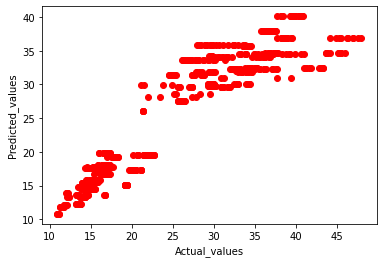

In [252]:
#  scatter plot
plt.scatter(data.Y2,pred03,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values")

In [253]:
m,b=np.polyfit(data.Y2,pred03,1)

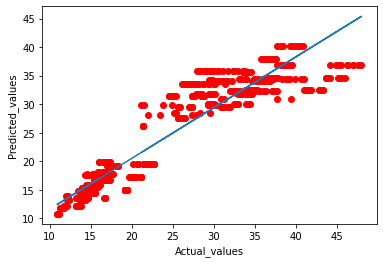

In [254]:
plt.scatter(data.Y2,pred03,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values") ;plt.plot(data.Y2,m*data.Y2+b)

Text(0, 0.5, 'residuals')

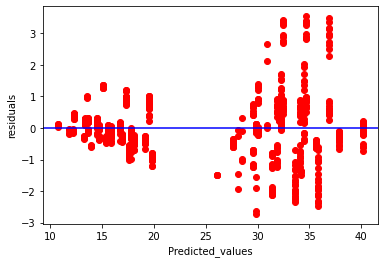

In [255]:
#residual value vs Predicted values
plt.scatter(pred03,model03.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("Predicted_values");plt.ylabel("residuals")

The model could predict the dependent variable fairly with R- squared value 0.88

(array([ 14.,  33.,  61., 210., 253., 120.,  40.,   7.,  12.,  18.]),
 array([-2.72584278, -2.09940333, -1.47296388, -0.84652444, -0.22008499,
         0.40635446,  1.03279391,  1.65923336,  2.28567281,  2.91211226,
         3.5385517 ]),
 <BarContainer object of 10 artists>)

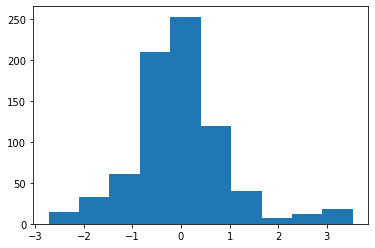

In [256]:
# histogram
plt.hist(model03.resid_pearson) # Checking the if standardized residuals are normally distributed

As we can see the some high residuals in the residual plot, we also check for RMSE values

In [257]:
data_resid=pred03-data.Y2
rmse_LR=np.sqrt(np.mean(data_resid*data_resid))
rmse_LR  # RMSE for data

3.1879689848974495

Calculatig R2 score

In [258]:
from sklearn.metrics import r2_score
R2_LR=np.mean(r2_score(Y.Y2,pred03))  # Calculating R2 score for data
R2_LR

0.8875573328171108

In [259]:
# Splitting the data into train and test data 

data_train,data_test  = train_test_split(data,test_size = 0.3,random_state=22) # 30% size

data_train.shape,'  ',data_test.shape

((537, 10), '  ', (231, 10))

In [260]:
# preparing the model on train data 

model_train = smf.ols("Y2~X1+X2+X3+X4+X5+X7",data=data_train).fit()

# train_data prediction
train_pred = model_train.predict(data_train)

In [261]:
# train residual values 
train_resid  = train_pred - data_train.Y2
train_resid

88    -4.267207
602   -0.377172
235   -4.377207
565    1.129973
548    0.856727
         ...   
491   -1.492995
502    2.462715
358    0.912715
356    1.322715
132   -0.128050
Length: 537, dtype: float64

In [262]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

3.2771617445015124

In [263]:
# preparing the model on testing data 

model_test = smf.ols("Y2~X1+X2+X3+X4+X5+X7",data=data_test).fit()

# test_data prediction
test_pred = model_test.predict(data_test)
# test residual values 
test_resid  = test_pred - data_test.Y2
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

2.9453156569491985

# Heating Load (Y1) 

In [264]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [265]:
data.corr() #Calculating co-relation

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<AxesSubplot:>

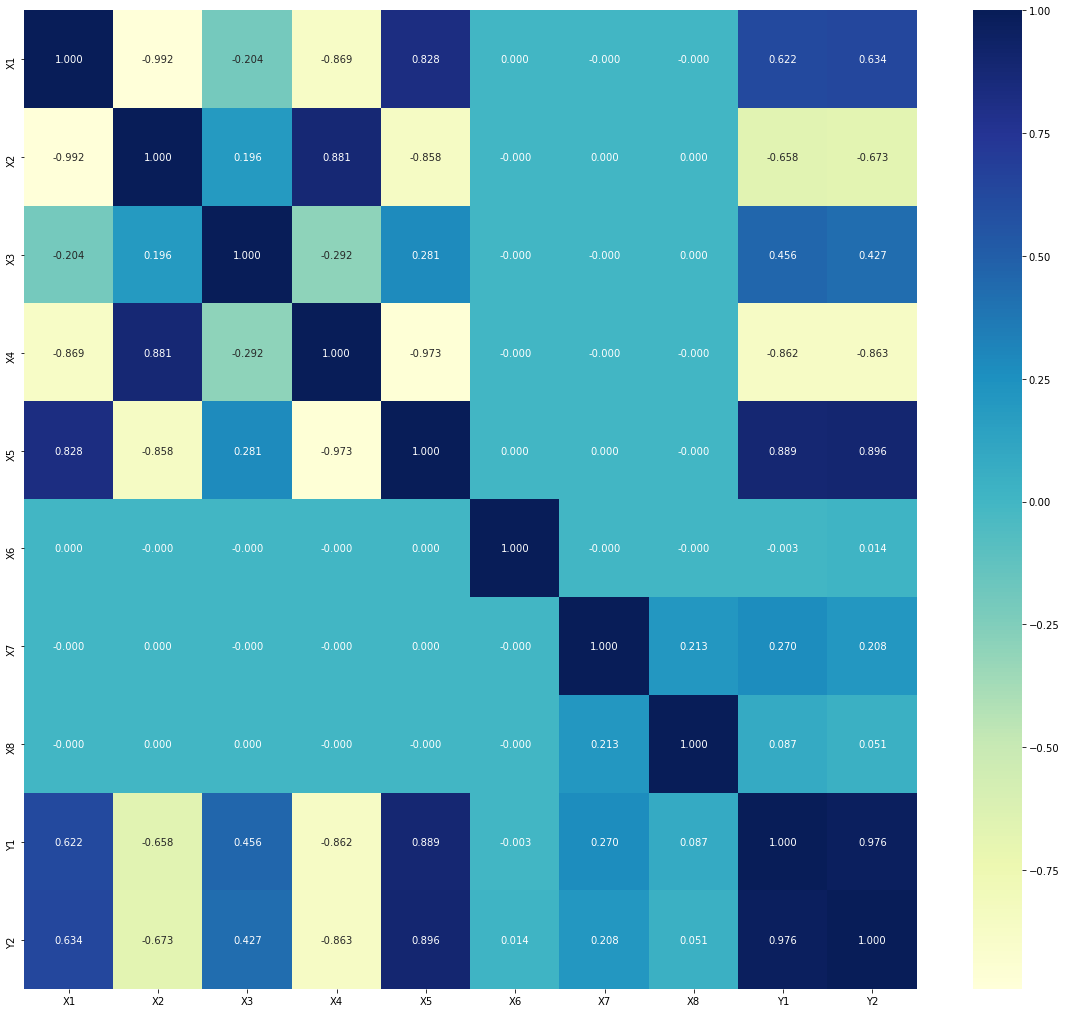

In [266]:
plt.subplots(figsize=(20,18))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu",fmt='0.3f')

Here we get high corelation between X5-Y1=0.889, X5-X1=0.828, X2-X4=0.881.
So, this attributes are highly corelated.

In [267]:
import statsmodels.formula.api as smf # fitting regression model

model02 = smf.ols('Y1~X1+X2+X3+X4+X5+X6+X7+X8', data = data).fit()

In [268]:
model02.params 

Intercept    84.013418
X1          -64.773432
X2           -0.062606
X3            0.036129
X4           -0.049368
X5            4.169954
X6           -0.023330
X7           19.932736
X8            0.203777
dtype: float64

In [269]:
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:58:54   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0134     19.034      4.414      0.000      46.649     121.378
X1           -64.7734     10.289     -6.295      0.000     -84.973     -44.574
X2            -0.0626      0.013     -4.670      0.000      -0.089      -0.036
X3             0.0361      0.004      9.386      0.000       0.029       0.044
X4            -0.0494      0.008     -6.569      0.000      -0.064      -0.035
X5             4.1700      0.338     12.338      0.000       3.506       4.833
X6            -0.0233      0.095     -0.246      0.805      -0.209       0.163
X7            19.9327      0.814     24.488      0.000      18.335      21.531
X8             0.2038      0.070      2.915      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.647   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.707
Skew:                           0.044   Prob(JB):                     6.49e-09
Kurtosis:                       4.082   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

There is high p and less correlation value for x6.

In [270]:
model03=smf.ols('Y1~X1+X2+X3+X4+X5+X7+X8',data=data).fit()  # fitting the model by droping X6
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:58:54   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3839.
Df Residuals:                     761   BIC:                             3871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.9318     19.019      4.413      0.000      46.596     121.268
X1           -64.7734     10.283     -6.299      0.000     -84.960     -44.587
X2            -0.0626      0.013     -4.673      0.000      -0.089      -0.036
X3             0.0361      0.004      9.392      0.000       0.029       0.044
X4            -0.0494      0.008     -6.573      0.000      -0.064      -0.035
X5             4.1700      0.338     12.345      0.000       3.507       4.833
X7            19.9327      0.813     24.503      0.000      18.336      21.530
X8             0.2038      0.070      2.916      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.654   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.739
Skew:                           0.044   Prob(JB):                     6.38e-09
Kurtosis:                       4.082   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Here we get r-squared value 0.916 and model fit perfectly.

In [271]:
pred03=model03.predict(data)  #predicting 
pred03

0      22.612183
1      22.612183
2      22.612183
3      22.612183
4      25.006803
         ...    
763    18.487654
764    19.134457
765    19.134457
766    19.134457
767    19.134457
Length: 768, dtype: float64

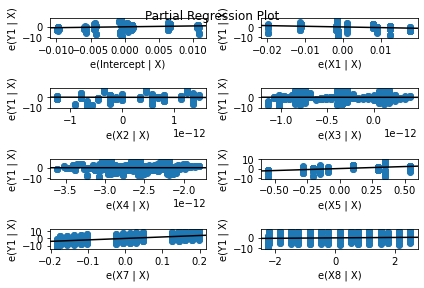

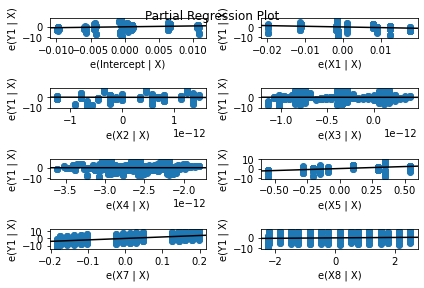

In [272]:
# added variable plot for the  model03
sm.graphics.plot_partregress_grid(model03)

Text(0, 0.5, 'predicted_values')

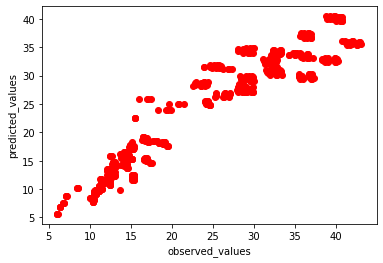

In [273]:
# Observed values VS Predicted values
plt.scatter(data.Y1,pred03,c="r");plt.xlabel("observed_values");plt.ylabel("predicted_values")

In [274]:
m,b=np.polyfit(data.Y1,pred03,1)

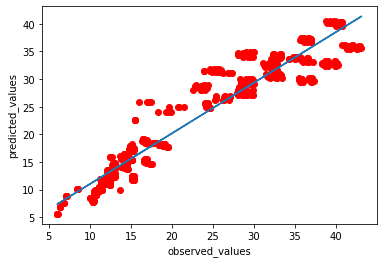

In [275]:
plt.scatter(data.Y1,pred03,c="r");plt.xlabel("observed_values");plt.ylabel("predicted_values");plt.plot(data.Y1,m*data.Y1+b)

Text(0, 0.5, 'residuals')

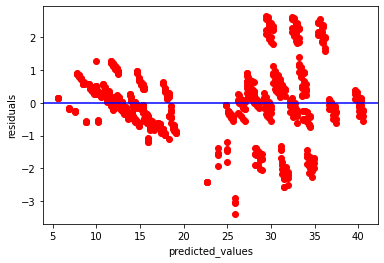

In [276]:
#residual value vs predicted values
plt.scatter(pred03,model03.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("predicted_values");plt.ylabel("residuals")

(array([  4.,  14.,  43.,  27., 134., 271., 167.,  48.,  17.,  43.]),
 array([-3.38669225, -2.78487227, -2.1830523 , -1.58123232, -0.97941235,
        -0.37759237,  0.2242276 ,  0.82604758,  1.42786755,  2.02968753,
         2.6315075 ]),
 <BarContainer object of 10 artists>)

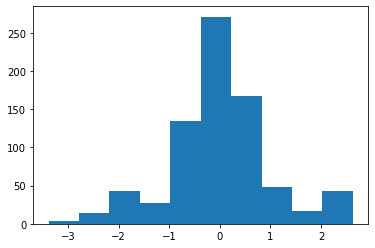

In [277]:
plt.hist(model03.resid_pearson) # Checking if the standardized residuals are normally distributed

In [278]:
# Splitting the data into train and test data 

data_train,data_test  = train_test_split(data,test_size = 0.3,random_state=22) # 30% size

data_train.shape,'  ',data_test.shape

((537, 10), '  ', (231, 10))

In [279]:
# preparing the model on train data 

model_train = smf.ols("Y1~X1+X2+X3+X4+X5+X7+X8",data=data_train).fit()

# train_data prediction
train_pred = model_train.predict(data_train)

In [280]:
# train residual values 
train_resid  = train_pred - data_train.Y1

In [281]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

2.914656888178612

In [282]:
# preparing the model on testing data 

model_test = smf.ols("Y1~X1+X2+X3+X4+X5+X7+X8",data=data_test).fit()

# test_data prediction
test_pred = model_test.predict(data_test)
# test residual values 
test_resid  = test_pred - data_test.Y1
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

2.912662173943254

In [283]:
data_resid=pred03-data.Y1
rmse_LR=np.sqrt(np.mean(data_resid*data_resid))
rmse_LR  #RMSE for data

2.919111981245407

In [284]:
R2_LR = np.mean(r2_score(Y.Y1, pred03))
R2_LR

0.9161954736036447

# Regression using Sklearn

In [285]:
from sklearn.linear_model import LinearRegression  # fitting model
model01=LinearRegression().fit(X_train,Y_train)
model01

LinearRegression()

In [286]:
pred01=model01.predict(X_test)   # predicting
pred01

array([[17.86470923, 19.39968901],
       [18.7228384 , 19.89723028],
       [11.51769476, 14.35010821],
       [27.84622902, 29.9085401 ],
       [18.41213097, 19.87070239],
       [ 5.54551773, 10.80341046],
       [11.89406404, 14.91768654],
       [29.26969939, 31.91890901],
       [31.95127007, 31.92707703],
       [15.33662108, 17.78448945],
       [28.8466523 , 29.9804495 ],
       [13.87113556, 16.80282025],
       [ 9.45176773, 13.81903546],
       [29.64434985, 32.18638945],
       [32.71985973, 34.2726024 ],
       [17.61221758, 19.1018028 ],
       [39.64589549, 39.76985675],
       [10.61281404, 13.84346779],
       [30.9766356 , 33.34184693],
       [10.16623351, 13.97345838],
       [28.44289395, 29.85255447],
       [12.74458991, 15.92833733],
       [31.69117512, 32.14230034],
       [28.7377503 , 31.37183865],
       [14.91135815, 17.2830703 ],
       [25.56926324, 27.83028905],
       [12.42815524, 15.38168606],
       [31.20762267, 33.26620904],
       [28.61566523,

In [287]:
Y

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [288]:
pred01[:,0]  

array([17.86470923, 18.7228384 , 11.51769476, 27.84622902, 18.41213097,
        5.54551773, 11.89406404, 29.26969939, 31.95127007, 15.33662108,
       28.8466523 , 13.87113556,  9.45176773, 29.64434985, 32.71985973,
       17.61221758, 39.64589549, 10.61281404, 30.9766356 , 10.16623351,
       28.44289395, 12.74458991, 31.69117512, 28.7377503 , 14.91135815,
       25.56926324, 12.42815524, 31.20762267, 28.61566523, 16.07847592,
       11.63225026, 11.43208991, 12.77369781, 32.45976478, 31.09451019,
       28.50110973, 31.31652466,  8.03842652, 15.38723356, 25.85846609,
       15.84748886, 25.8002503 , 30.94752771, 29.04127771, 32.08767971,
       39.87688255, 14.94046604, 31.48929594,  8.18208991, 33.89863407,
        9.89834826, 34.28313255, 12.63003441, 15.87831558, 33.76626173,
       17.20845923, 13.65921604, 11.86495615, 11.08654735, 26.60051324,
       31.11464549, 15.79099191, 15.64732852, 32.66164395, 18.69373051,
       14.30572063,  6.85801773, 31.14940689,  9.5528057 , 30.31

In [289]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_LR = sqrt(mean_squared_error(Y_test, pred01))        # RMSE of complete Y

In [290]:
rmse_LR_Y1 = sqrt(mean_squared_error(Y_test.Y1,pred01[:,0]))   #RMSE of Y1
rmse_LR_Y2 = sqrt(mean_squared_error(Y_test.Y2,pred01[:,1]))   # RMSE of Y2

In [291]:
from sklearn.metrics import r2_score
R2_LR=np.mean(r2_score(Y_test,pred01))   #R squared score of complete Y
R2_LR_Y1=np.mean(r2_score(Y_test.Y1,pred01[:,0]))   #R squared score of Y1
R2_LR_Y2=np.mean(r2_score(Y_test.Y2,pred01[:,1]))   #R squared score of Y2

By observing both stats model and sklearn model both outcomes are same. So, we conclude that results of both regresion model is same , it's complete our decision whether to choose any one from it.

# Decision Tree

In [292]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=123)
dt_model.fit(X_train, Y_train)
y_pred02 = dt_model.predict(X_test)
R2_dt = np.mean(r2_score(Y_test, y_pred02))
R2_dt_Y1 = np.mean(r2_score(Y_test.Y1, y_pred02[:,0]))
R2_dt_Y2 = np.mean(r2_score(Y_test.Y2, y_pred02[:,1]))
rmse_dt = sqrt(mean_squared_error(Y_test, y_pred02))
rmse_dt_Y1 = sqrt(mean_squared_error(Y_test.Y1, y_pred02[:,0]))
rmse_dt_Y2 = sqrt(mean_squared_error(Y_test.Y2, y_pred02[:,1]))

# Random Forests

In [293]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train,Y_train)
y_pred03 = rf_model.predict(X_test)
R2_rf = np.mean(r2_score(Y_test, y_pred03))
rmse_rf = sqrt(mean_squared_error(Y_test, y_pred03))
R2_rf_Y1 = np.mean(r2_score(y_test.Y1, y_pred03[:,0]))
R2_rf_Y2 = np.mean(r2_score(y_test.Y2, y_pred03[:,1]))
rmse_rf_Y1 = sqrt(mean_squared_error(y_test.Y1, y_pred03[:,0]))
rmse_rf_Y2 = sqrt(mean_squared_error(y_test.Y2, y_pred03[:,1]))

# Extra tree

In [294]:
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=123)
et_model.fit(X_train, y_train)
y_pred04 = et_model.predict(X_test)
R2_et = np.mean(r2_score(y_test, y_pred04))
rmse_et = sqrt(mean_squared_error(Y_test, y_pred04))
R2_et_Y1 = np.mean(r2_score(y_test.Y1, y_pred04[:,0]))
R2_et_Y2 = np.mean(r2_score(y_test.Y2, y_pred04[:,1]))
rmse_et_Y1 = sqrt(mean_squared_error(y_test.Y1, y_pred04[:,0]))
rmse_et_Y2 = sqrt(mean_squared_error(y_test.Y2, y_pred04[:,1]))


In [295]:
models= pd.DataFrame({ 
"Model" : ["Linear Regression","Decision Tree","Extra Tree","Random Forest"], 
"R2 Score" : [R2_LR,R2_dt,R2_et,R2_rf], "R2 Score_Y1" : [R2_LR_Y1,R2_dt_Y1,R2_et_Y1,R2_rf_Y1], "R2 Score_Y2" : [R2_LR_Y2,R2_dt_Y2,R2_et_Y2,R2_rf_Y2],
"RMSE Value" : [rmse_LR,rmse_dt,rmse_et,rmse_rf], "RMSE_Y1 Value" : [rmse_LR_Y1,rmse_dt_Y1,rmse_et_Y1,rmse_rf_Y1], "RMSE_Y2 Value" : [rmse_LR_Y2,rmse_dt_Y2,rmse_et_Y2,rmse_rf_Y2]
           })
models
models.sort_values(by="R2 Score")

,Model,R2 Score,R2 Score_Y1,R2 Score_Y2,RMSE Value,RMSE_Y1 Value,RMSE_Y2 Value
0,Linear Regression,0.912039,0.922807,0.901271,2.908806,2.806453,3.007678
1,Decision Tree,0.971544,0.996166,0.946921,1.620887,0.625451,2.205302
2,Extra Tree,0.977775,0.997233,0.958317,1.432052,0.531315,1.954291
3,Random Forest,0.979325,0.997157,0.961493,1.381727,0.538596,1.878365


By looking at the R2 score and RMSE for both dependent variables Heating load and cooling load, the model Random Forest performs better. So the Energy Efficiency prediction model is built using Random Forest.

Storing the model into file

In [296]:
import pickle
# save the model to disk
filename = 'EE_model_RF.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [297]:
a={'X1':[0.98,0.90,0.86,0.82,0.79],'X2':[514.50,563.50,588.00,612.00,637.00],'X3':[294.00,318.50,294.00,318.50,343.00],'X4':[110.25,122.50,147.00,147.00,147.00],'X5':[7.00,7.00,7.00,7.00,7.00],'X6':[2,3,4,5,2],'X7':[0.10,0.10,0.10,0.10,0.10],'X8':[1,1,1,1,1]}
b=pd.DataFrame.from_dict(a)
b

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.1,1
1,0.90,563.5,318.5,122.50,7.0,3,0.1,1
2,0.86,588.0,294.0,147.00,7.0,4,0.1,1
3,0.82,612.0,318.5,147.00,7.0,5,0.1,1
4,0.79,637.0,343.0,147.00,7.0,2,0.1,1


In [298]:
a={'X1':[0.98],'X2':[514.50],'X3':[294.00],'X4':[110.25],'X5':[7.00],'X6':[2],'X7':[0.10],'X8':[1]}
b=pd.DataFrame.from_dict(a)
b

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.1,1


In [299]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(b)

In [300]:
result

array([[24.5938, 26.4074]])

In [301]:
float(result[:,0])

24.59380000000001

In [302]:
t=np.around(result[:,0],2)
float(t)

24.59

In [303]:
print("The value of Heating load is",float(result[:,0]),"\n")

The value of Heating load is 24.59380000000001 



In [304]:
print("The value of Cooling load is",float(result[:,1]),"\n")

The value of Cooling load is 26.40739999999996 

